<ipython-input-30-51310ed84967>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=protocol_categories, x='Protocol', y='Number of Packets', palette='Set2')


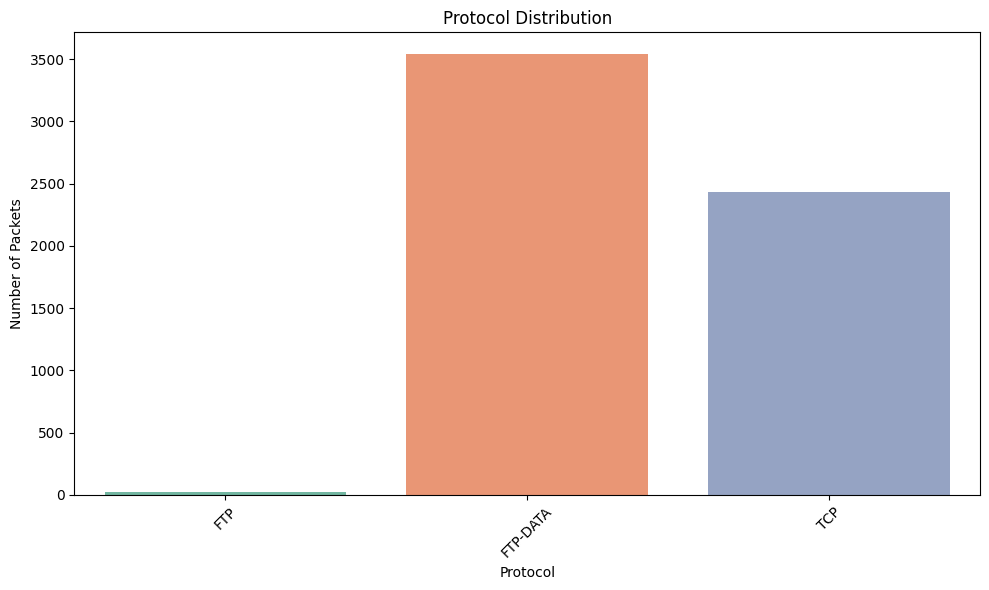

In [30]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the network traffic log file
network_traffic_log = pd.read_csv('/content/drive/MyDrive/Processed_Network_Traffic_Analysis.csv', delimiter=',', comment='#', header=0)

# Ensure that the required columns are present in the CSV file
required_columns = ['Protocol', 'Info', 'Length']
for column in required_columns:
    if column not in network_traffic_log.columns:
        print(f"The '{column}' column is not present in the CSV file.")
        break
else:
    # Group the data by protocol categories
    protocol_groups = network_traffic_log.groupby('Protocol')

    # Create an empty list to store dictionaries
    protocol_categories_data = []

    # Calculate the protocol distribution
    for protocol_category, group in protocol_groups:
        number_of_packets = len(group)
        protocol_categories_data.append({'Protocol': protocol_category, 'Number of Packets': number_of_packets})

    # Create a DataFrame from the list of dictionaries
    protocol_categories = pd.DataFrame(protocol_categories_data)

    # Plot the protocol distribution
    plt.figure(figsize=(10, 6))
    sns.barplot(data=protocol_categories, x='Protocol', y='Number of Packets', palette='Set2')
    plt.title('Protocol Distribution')
    plt.xlabel('Protocol')
    plt.ylabel('Number of Packets')
    plt.xticks(rotation=45)

    # # Adding a sentence-style graph description
    # plt.text(0, protocol_categories['Number of Packets'].max() + 200,
    #          "The plot shows the distribution of network traffic by protocol. "
    #          "It's evident that some protocols have significantly higher traffic volumes than others.")

    plt.tight_layout()
    plt.show()